# <span style="color:#F72585"><center>Introducción a FastText</center></span>

<center>Biblioteca para clasificación de texto eficiente y aprendizaje de representación</center>

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Tratamiento_de_Lenguaje_Natural/Imagenes/fast_highway.jpg" width="600" height="600" align="center"/>
</center>
</figure>

Fuente: [Pexels](https://www.pexels.com/es-es/foto/fotografia-de-lapso-de-tiempo-de-carretera-de-asfalto-durante-la-noche-2955704/)

## <span style="color:#4361EE">Introducción</span>

El modelo [FastText](https://fasttext.cc/) fue introducido por primera vez por Facebook en 2016 como una extensión y supuestamente una mejora del modelo vainilla de Word2Vec. 

Está basado en el artículo original titulado [Enriching Word Vectors with Subword Information](https://arxiv.org/pdf/1607.04606.pdf) de Mikolov et al. que es una lectura excelente para obtener una comprensión profunda de como funciona este modelo. En general, FastText es un marco para el aprendizaje de representaciones de palabras y también para realizar una clasificación de texto sólida, rápida y precisa. 

El marco es de código abierto de Facebook en GitHub y afirma tener lo siguiente:

1. Vectores de palabras en inglés de última generación.
2. Vectores de palabras para 157 idiomas entrenados en Wikipedia y rastreo.
3. Modelos para identificación de idiomas y diversas tareas supervisadas.

De acuedo con los autores,  en general, los modelos predictivos como el modelo *Word2Vec* suelen considerar cada palabra como una entidad distinta (por ejemplo, "dónde") y generan una incrustación densa para la palabra. 

Sin embargo, esto representa una seria limitación con los idiomas que tienen un vocabulario masivo y muchas palabras raras que pueden no aparecer mucho en diferentes corpus. El modelo Word2Vec normalmente ignora la estructura morfológica de cada palabra y considera una palabra como una sola entidad. 

El modelo **FastText** considera cada palabra como una bolsa de n-gramas de caracteres. Esto también se denomina modelo de subpalabras en el documento.


Se agregan símbolos de límites especiales **\<y>** al principio y al final de las palabras. Esto  permite distinguir prefijos y sufijos de otras secuencias de caracteres. También incluyen la propia palabra *w* en el conjunto de sus n-gramas, para aprender una representación de cada palabra (además de su carácter n-gramas). 
    
    
Tomando la palabra *where* y n = 3 (tri-gramas) como ejemplo, estará representada por el carácter n-gramas: **<wh, whe, her, ere, re>** y la secuencia especial **\<where>** que representa la palabra completa . 
    
Tenga en cuenta que la secuencia, correspondiente a la palabra **\<her>** es diferente del trigrama ella de la palabra where.
    
En la práctica, el artículo recomienda extraer todos los n-gramas para $3\le n \le 6$. Este es un enfoque muy simple, y se podrían considerar diferentes conjuntos de n-gramas, por ejemplo, tomando todos los prefijos y sufijos. 
    
Normalmente asociamos una representación vectorial (incrustación) a cada n-grama de una palabra. Por tanto, podemos representar una palabra mediante la suma de las representaciones vectoriales de sus n-gramas o el promedio de la incrustación de estos n-gramas. 
    
Según los autores, debido a este efecto de aprovechar los n-gramas de palabras individuales basadas en sus caracteres, existe una mayor probabilidad de que las palabras raras obtengan una buena representación, ya que sus n-gramas basados en caracteres deben aparecer en otras palabras del corpus.
    
Vamos a la práctica.

## <span style="color:#4361EE">Instalación</span>

Para instalar con pip.

`$ git clone https://github.com/facebookresearch/fastText.git`

`$ cd fastText`

`$ sudo pip install .`

`$ # or :`

`$ sudo python setup.py install`

`$ sudo python setup.py install`

Para instalar con conda.

`$ conda install -c conda-forge fasttext`

Si todo va bien, el siguiente comando debería funcionar:

In [1]:
import fasttext as ft

In [2]:
help(ft.FastText)

Help on module fasttext.FastText in fasttext:

NAME
    fasttext.FastText

DESCRIPTION
    # Copyright (c) 2017-present, Facebook, Inc.
    # All rights reserved.
    #
    # This source code is licensed under the MIT license found in the
    # LICENSE file in the root directory of this source tree.

FUNCTIONS
    cbow(*kargs, **kwargs)
    
    eprint(*args, **kwargs)
    
    load_model(path)
        Load a model given a filepath and return a model object.
    
    read_args(arg_list, arg_dict, arg_names, default_values)
    
    skipgram(*kargs, **kwargs)
    
    supervised(*kargs, **kwargs)
    
    tokenize(text)
        Given a string of text, tokenize it and return a list of tokens
    
    train_supervised(*kargs, **kwargs)
        Train a supervised model and return a model object.
        
        input must be a filepath. The input text does not need to be tokenized
        as per the tokenize function, but it must be preprocessed and encoded
        as UTF-8. You might wan

In [3]:
dir(ft)

['BOW',
 'EOS',
 'EOW',
 'FastText',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'cbow',
 'division',
 'load_model',
 'print_function',
 'skipgram',
 'supervised',
 'tokenize',
 'train_supervised',
 'train_unsupervised',
 'unicode_literals']

Como podemos observar, contamos con dos modelos: **no supervisado** y **supervisado**.

Veamos como funcionan.

## <span style="color:#4361EE">Modelo No Supervisado</span>

Para este ejemplo de juguete, usemos los poemas de Daniel.

## <span style="color:#4361EE">Uso del Modelo (Ejemplo de juguete)</span>

In [4]:
model = ft.train_unsupervised('../Datos/FastText/Poemas_Todo.txt')

Read 0M words
Number of words:  184
Number of labels: 0
Progress: 100.0% words/sec/thread:  160087 lr:  0.000000 avg.loss:  4.119813 ETA:   0h 0m 0s


Veamos que tiene el modelo por dentro:

In [5]:
dir(model)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_labels',
 '_words',
 'bucket',
 'dim',
 'epoch',
 'f',
 'get_analogies',
 'get_dimension',
 'get_input_matrix',
 'get_input_vector',
 'get_label_id',
 'get_labels',
 'get_line',
 'get_meter',
 'get_nearest_neighbors',
 'get_output_matrix',
 'get_sentence_vector',
 'get_subword_id',
 'get_subwords',
 'get_word_id',
 'get_word_vector',
 'get_words',
 'is_quantized',
 'label',
 'labels',
 'loss',
 'lr',
 'lrUpdateRate',
 'maxn',
 'minCount',
 'minCountLabel',
 'minn',
 'neg',
 'predict',
 'pretrainedVectors',
 'quantize',
 'save_model',
 'set_args',
 'set_matrices',
 't',
 'test',
 'test_la

In [6]:
print(model.words)

['</s>', 'y', 'de', 'que', 'la', 'el', 'en', 'las', 'con', 'los', 'por', 'un', 'se', 'tu', 'del', 'a', 'una', 'no', 'mi', 'te', 'es', 'me', 'como', 'su', 'mis', 'para', 'sin', 'tus', 'entre', 'porque', 'más', 'lo', 'sus', 'nos', 'noche', 'ese', 'cada', 'hasta', 'pero', 'al', 'todo', 'manos', 'Y', 'cielo', 'cuerpo', 'día', 'ojos', 'ni', 'sueño', 'cuando', 'son', 'ser', 'qué', 'le', 'o', 'Me', 'Te', 'labios', 'ya', 'palabras', 'cuerpos', 'luna', 'cosas', 'si', 'mundo', 'vida', 'eres', 'mujer', 'sobre', 'esa', 'sólo', 'donde', 'este', 'toda', 'sueños', 'jamás', 'En', 'piel,', 'amor', 'e', 'Es', 'siempre', 'Ese', 'va', 'hay', 'visto', 'tan', 'he', 'gusta', 'sueños,', 'lleno', 'imagen', 'contra', 'mar', 'dos', 'Yo', 'He', 'rostro', 'La', 'noche,', 'pasión', 'nuestra', 'quien', 'deseo', 'ha', 'nubes', 'puedo', 'frío', 'abismo', 'alma', 'aire', 'lejos', 'profundo', 'éste', 'volando', 'ésta', 'aún', 'dulce', 'colores', 'cara', 'mismo', 'música', 'El', 'vez', 'letras', 'formas', 'apenas', 'ojos

In [7]:
len(model.words)

184

In [8]:
soy_vector = model.get_word_vector("soy")
soy_vector

array([-2.9915192e-03,  6.1537456e-03, -1.4034220e-03, -3.1447851e-03,
        6.5046158e-03,  6.3317292e-03, -4.7094910e-03, -2.2418629e-03,
        8.9668510e-03,  3.7645306e-03,  1.1709495e-03, -4.1423173e-04,
        1.1809296e-03,  7.6887463e-03, -5.0663548e-03, -2.6360496e-03,
       -2.4895363e-03,  6.5870688e-04, -6.3768635e-04, -4.5736264e-03,
        7.8637415e-04,  2.5391274e-03,  1.4487669e-03, -3.1825944e-03,
        4.1096332e-03, -2.6797096e-03,  3.3247815e-03, -2.0180657e-03,
       -2.3057070e-03,  6.2383553e-03, -3.3086950e-03,  9.1557787e-04,
       -2.5833468e-03, -4.4707041e-03, -7.4041933e-03, -1.6959464e-04,
        2.6579399e-04, -3.3056703e-03, -2.7136332e-03, -5.1288940e-03,
        2.5471854e-03,  6.5117264e-03,  1.0773963e-03,  3.2331774e-03,
       -1.1536902e-03, -1.2664184e-03,  1.4104240e-03,  1.7512472e-03,
       -2.9278880e-03,  2.1206345e-03, -5.8301939e-03,  8.1454283e-03,
       -2.8221782e-03,  9.3944912e-04, -5.5266015e-04, -1.3883370e-03,
      

In [9]:
soy_vector.shape

(100,)

In [10]:
model.save_model("../Datos/FastText/Poemas.bin")

In [11]:
model = ft.load_model("../Datos/FastText/Poemas.bin")

Por defecto, el modelo entrenado es *Skipgram*, pero también tenemos disponible la arquitectura *CBOW*.

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Tratamiento_de_Lenguaje_Natural/Imagenes/cbo_vs_skipgram.png" width="600" height="600" align="center"/>
</center>
</figure>

Fuente: [FastText, Word Representations](https://fasttext.cc/docs/en/unsupervised-tutorial.html)

In [12]:
# model_cbow = fasttext.train_unsupervised('../Datos/FastText/Poemas_Todo.txt', "cbow")

En palabras de Facebook,

***In practice, we observe that skipgram models works better with subword information than cbow.***

### <span style="color:#4CC9F0">Jugando con los Parámetros</span>

Dependiendo del problema, puede ser que los parámetros por defecto no sean los más adecuados.

Para conocer todos los parámetros de FastText, podemos ingresar [aquí](https://fasttext.cc/docs/en/python-module.html#train_unsupervised-parameters).

Por ejemplo, modifiquemos los parámetros **mínimos** y **máximos** de lo n-gramas permitidos, la **dimensión** del vector, las **epochs** y la **frecuencia** mínima de palabras:

In [13]:
import fasttext as ft

In [14]:
model = ft.train_unsupervised('../Datos/FastText/Poemas_Todo.txt', minCount=2, minn=2, maxn=5, dim=300)

Read 0M words
Number of words:  846
Number of labels: 0
Progress: 100.0% words/sec/thread:   80280 lr:  0.000000 avg.loss:  3.529274 ETA:   0h 0m 0s


Verifiquemos la longitud de las palabras:

In [15]:
model.get_word_vector("soy").shape

(300,)

### <span style="color:#4CC9F0">Palabras vecinas más cercanas</span>

Como cada palabra en el corpus tiene un vector asociado, podemos obtener palabras cercanas usando la similaridad de coseno:

In [16]:
 model.get_nearest_neighbors('sueño',k=20)

[(0.9999990463256836, 'sueños'),
 (0.9999988675117493, 'sueño,'),
 (0.9999987483024597, 'sueños,'),
 (0.9999985098838806, 'cielo'),
 (0.9999985098838806, 'pequeño'),
 (0.9999983906745911, 'suerte'),
 (0.9999983906745911, 'pensamientos'),
 (0.9999983310699463, 'pequeña'),
 (0.9999983310699463, 'pensamiento,'),
 (0.9999982118606567, 'canto,'),
 (0.9999982118606567, 'cielo,'),
 (0.999998152256012, 'mano'),
 (0.999998152256012, 'manera'),
 (0.999998152256012, 'lienzo'),
 (0.999998152256012, 'suelo,'),
 (0.999998152256012, 'estar,'),
 (0.9999980330467224, 'miradas'),
 (0.9999980330467224, 'viento,'),
 (0.9999980330467224, 'controlado'),
 (0.9999980330467224, 'venido')]

### <span style="color:#4CC9F0">Visualización de Embeddings de Palabras</span>

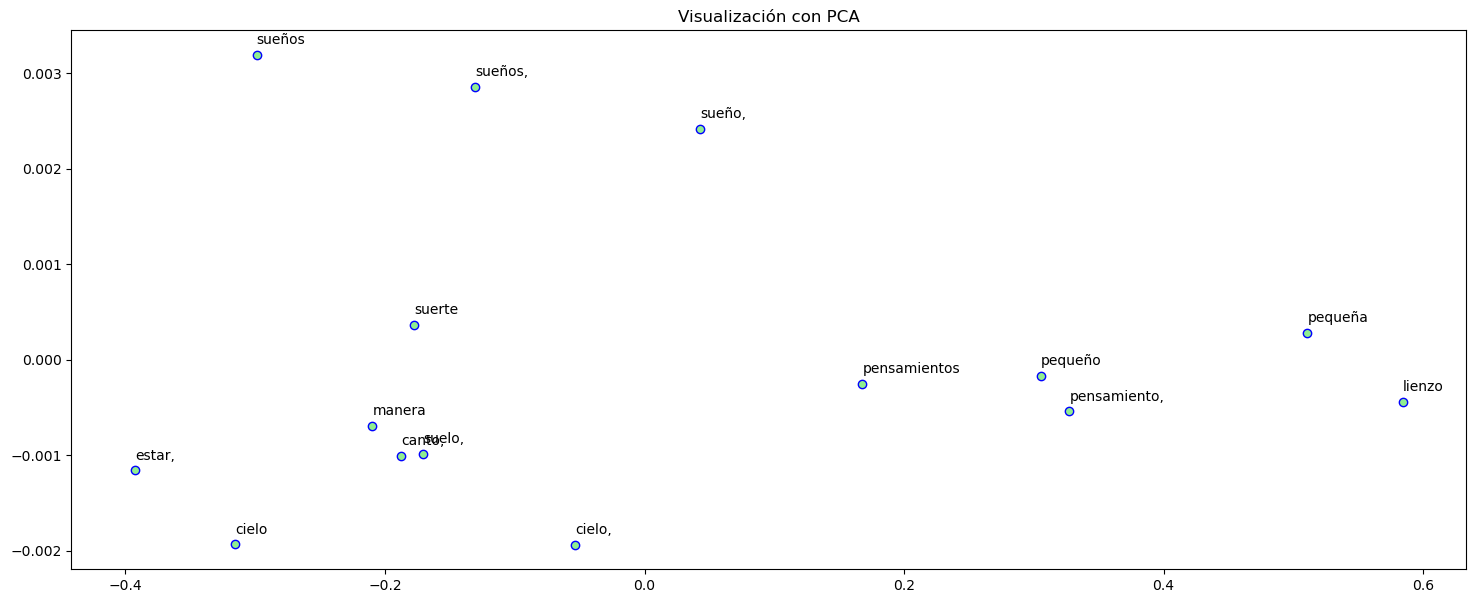

In [17]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

p = model.get_nearest_neighbors('sueño',k=15)
similar_words = [x[1] for x in p]
wvs = np.array([model.get_word_vector(sw) for sw in similar_words])

pca = PCA(n_components=2)
P = pca.fit_transform(wvs)
labels = similar_words

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='b')
plt.title('Visualización con PCA')

eps = 0.5e12*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')

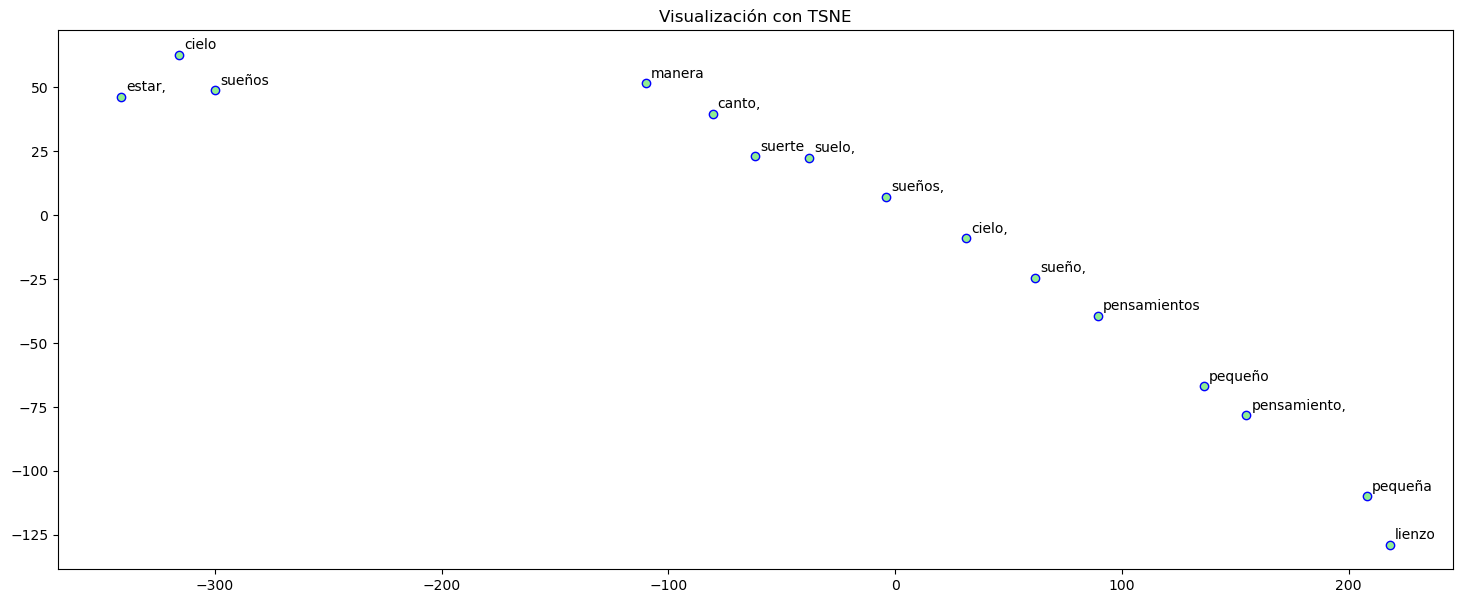

In [18]:
%matplotlib tk
%matplotlib inline
# visualize embeddings
from sklearn.manifold import TSNE

p = model.get_nearest_neighbors('sueño',k=15)
similar_words = [x[1] for x in p]
wvs = np.array([model.get_word_vector(sw) for sw in similar_words])

tsne = TSNE(n_components=2, random_state=200, n_iter=5000, perplexity=2,learning_rate='auto',init='pca')
P = tsne.fit_transform(wvs)
labels = similar_words

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='b')
plt.title('Visualización con TSNE')

eps = 1e16*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')

### <span style="color:#4CC9F0">Visualización de Embeddings de Textos</span>

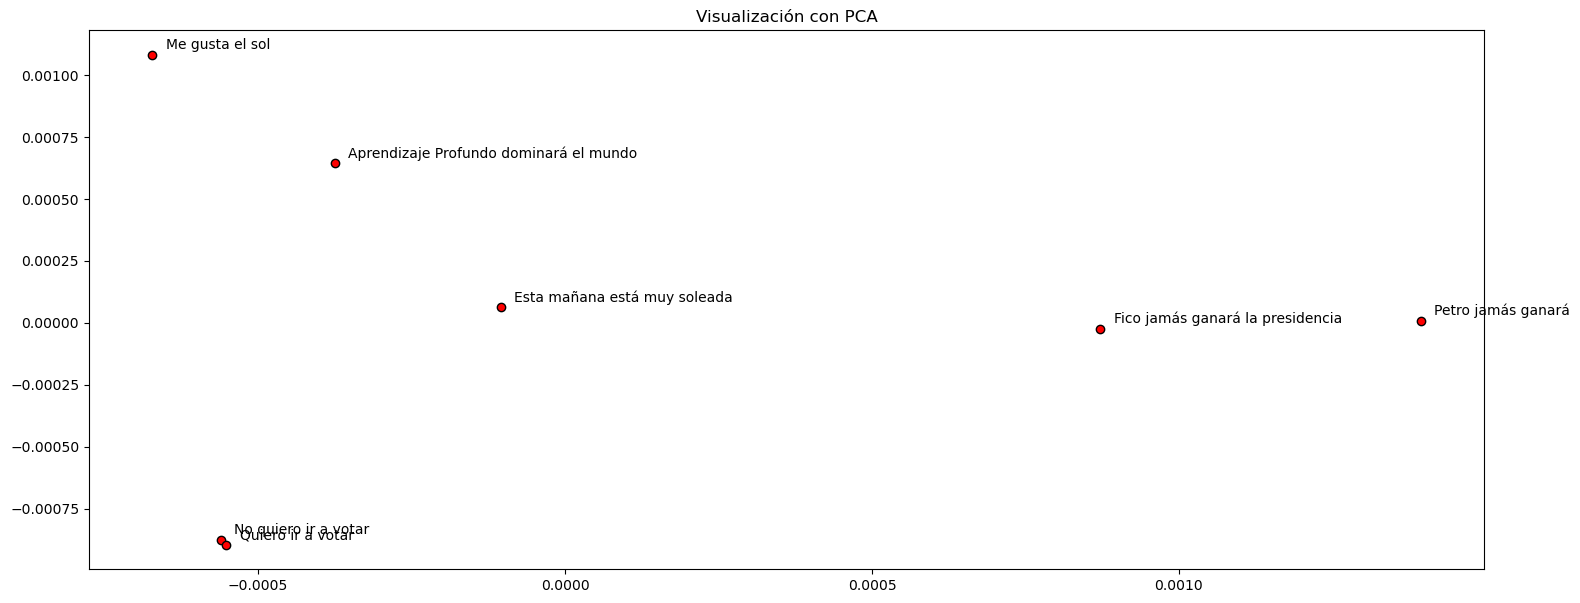

In [19]:
textos = ['Esta mañana está muy soleada',
         'Petro jamás ganará',
         'Fico jamás ganará la presidencia',
         'No quiero ir a votar',
         'Quiero ir a votar',
         'Me gusta el sol',
         'Aprendizaje Profundo dominará el mundo']

wvs = np.array([model.get_sentence_vector(t) for t in textos])

pca = PCA(n_components=2)
P = pca.fit_transform(wvs)
labels = textos

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='red', edgecolors='k')
plt.title('Visualización con PCA')

eps = 1e11*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')
    

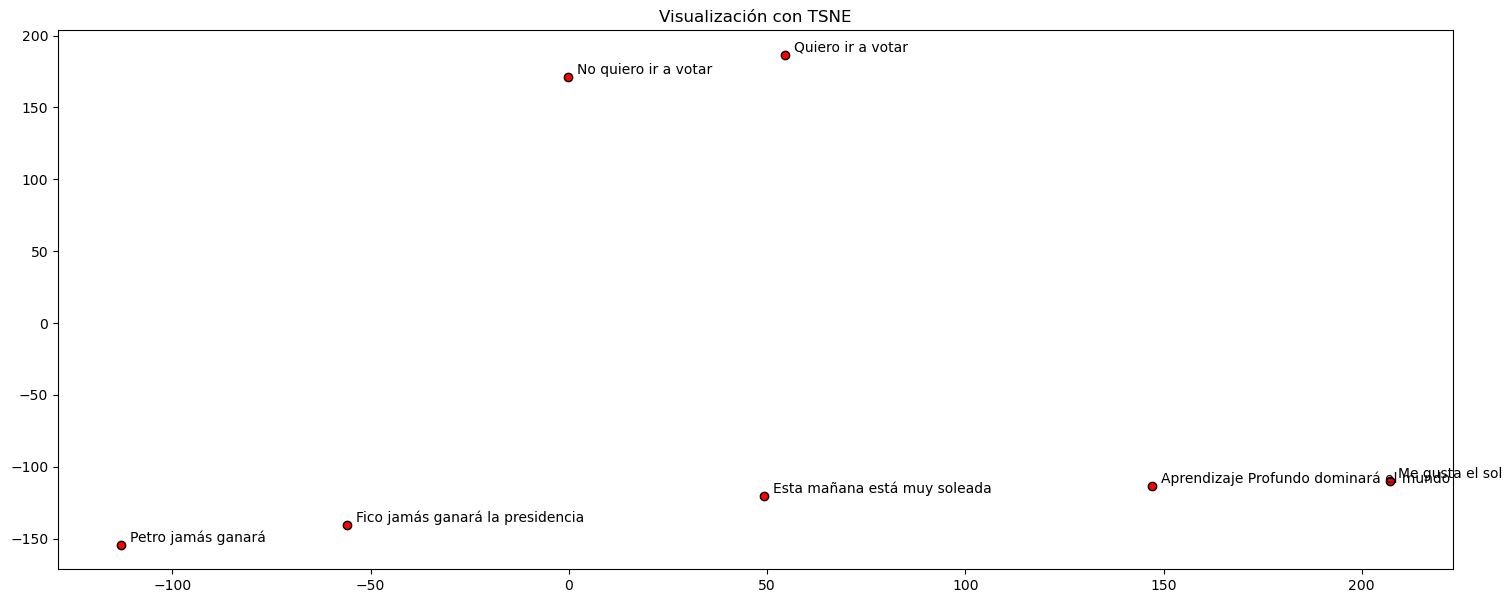

In [20]:
textos = ['Esta mañana está muy soleada',
         'Petro jamás ganará',
         'Fico jamás ganará la presidencia',
         'No quiero ir a votar',
         'Quiero ir a votar',
         'Me gusta el sol',
         'Aprendizaje Profundo dominará el mundo']

wvs = np.array([model.get_sentence_vector(t) for t in textos])

tsne = TSNE(n_components=2, random_state=200, n_iter=5000, perplexity=2,learning_rate='auto',init='pca')
P = tsne.fit_transform(wvs)
labels = textos

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='r', edgecolors='k')
plt.title('Visualización con TSNE')

eps = 1e16*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')

### <span style="color:#4CC9F0">Usando Modelos Pre-entrados en Español</span>

In [21]:
# Descargar modelo
#import fasttext.util as ftu
#ftu.download_model('es', if_exists='ignore')

In [22]:
import fasttext as ft

model_es = ft.load_model('../Datos/FastText/cc.es.300.bin')

In [23]:
#¡Requiere demasiado tiempo! No ejecutar en clase
model_es.get_nearest_neighbors('sueño',k=15)

[(0.7171677947044373, 'sueños'),
 (0.7092401385307312, 'sueno'),
 (0.6959096789360046, 'sueño.El'),
 (0.6859577298164368, 'sueño.Y'),
 (0.6825155019760132, 'Sueño'),
 (0.6815561652183533, 'sueño.La'),
 (0.6758346557617188, 'sueño.Pero'),
 (0.6724787950515747, 'sueño.A'),
 (0.6669973134994507, 'sueño.Es'),
 (0.6650846600532532, 'sueñoUn'),
 (0.6573185920715332, 'elsueño'),
 (0.6529608964920044, 'sueño.Un'),
 (0.6516568064689636, 'sueñ'),
 (0.6469879746437073, 'sueño.En'),
 (0.6467815637588501, 'sueñoEn')]

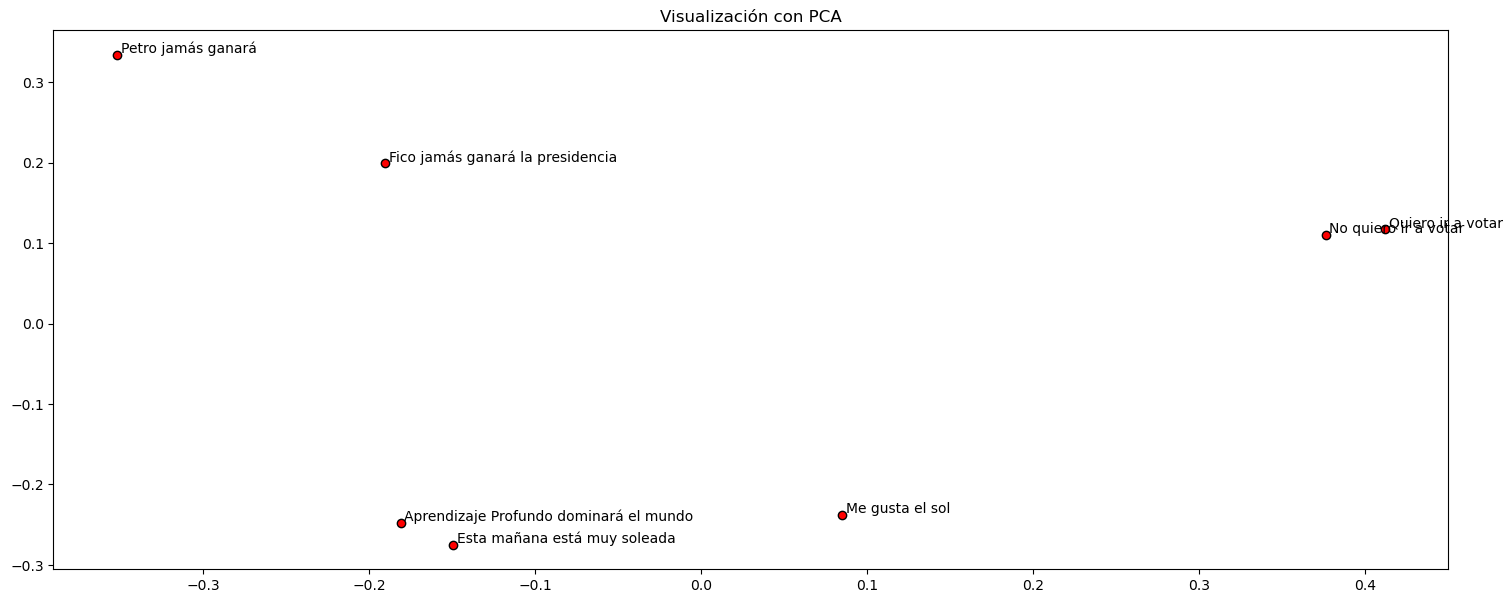

In [24]:
textos = ['Esta mañana está muy soleada',
         'Petro jamás ganará',
         'Fico jamás ganará la presidencia',
         'No quiero ir a votar',
         'Quiero ir a votar',
         'Me gusta el sol',
         'Aprendizaje Profundo dominará el mundo']

wvs = np.array([model_es.get_sentence_vector(t) for t in textos])

pca = PCA(n_components=2)
P = pca.fit_transform(wvs)
labels = textos

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='red', edgecolors='k')
plt.title('Visualización con PCA')

eps = 1e13*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')

### <span style="color:#4CC9F0">Re-entrenando Embedding</span>

### <span style="color:red">¡NO CORRER DE MANERA LOCAL A MENOS QUE TENGA SUFICIENTE MEMORIA RAM!</span>

In [25]:
#model_transfer_learning_es = ft.train_unsupervised('Poemas_Todo.txt', minCount=2, minn=2, maxn=5, dim=300,pretrainedVectors='cc.es.300.vec')

### <span style="color:#4CC9F0">Bonus: Transformers</span>

In [26]:
from sentence_transformers import SentenceTransformer

model_tr_es = SentenceTransformer('hiiamsid/sentence_similarity_spanish_es')

2022-12-06 14:00:22.407929: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


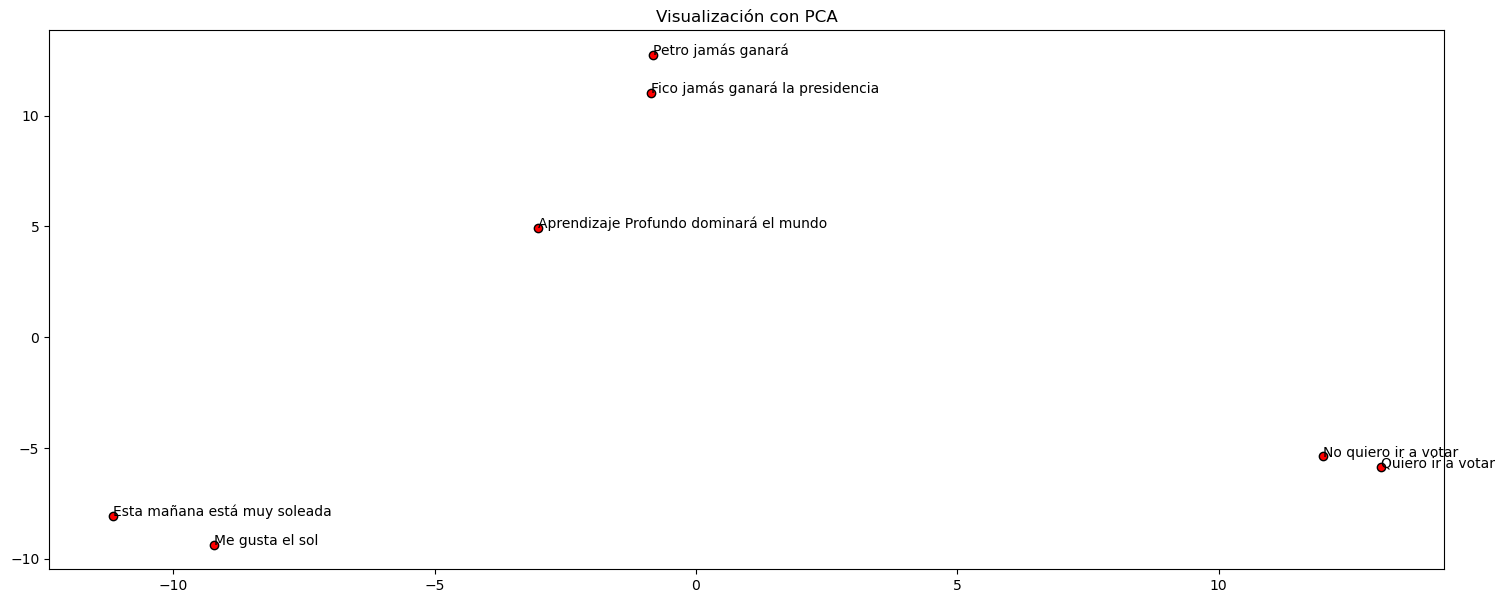

In [27]:
textos = ['Esta mañana está muy soleada',
         'Petro jamás ganará',
         'Fico jamás ganará la presidencia',
         'No quiero ir a votar',
         'Quiero ir a votar',
         'Me gusta el sol',
         'Aprendizaje Profundo dominará el mundo']

sent_vec = model_tr_es.encode(textos)

pca = PCA(n_components=2)
P = pca.fit_transform(sent_vec)
labels = textos

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='red', edgecolors='k')
plt.title('Visualización con PCA')
eps = 1e11*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')

## <span style="color:#4361EE">Uso del Modelo (Wikipedia)</span>

Primero que todo, obtengamos los datos que necesitamos:

In [ ]:
# Corpus Completo
#!wget https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2 -o ../Datos/FastText/enwiki-latest-pages-articles.xml.bz2

Para descargar.

In [1]:
# Corpus 1 billón de bytes (1 Giga)
!wget -c http://mattmahoney.net/dc/enwik9.zip -P ../Datos/FastText

--2022-12-06 14:35:31--  http://mattmahoney.net/dc/enwik9.zip
Resolviendo mattmahoney.net (mattmahoney.net)... 67.195.197.24
Conectando con mattmahoney.net (mattmahoney.net)[67.195.197.24]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 322592222 (308M) [application/zip]
Guardando como: ‘../Datos/FastText/enwik9.zip’

enwik9.zip          100%[===================>] 307,65M   596KB/s    en 8m 48s  

2022-12-06 14:44:18 (597 KB/s) - ‘../Datos/FastText/enwik9.zip’ guardado [322592222/322592222]



Como el formato viene en `.zip`, descomprimamos el contenido.

In [2]:
!unzip ../Datos/FastText/enwik9.zip -d ../Datos/FastText

Archive:  ../Datos/FastText/enwik9.zip
  inflating: ../Datos/FastText/enwik9  


Miremos algo de información:

In [4]:
!head -c 2000 ../Datos/FastText/enwik9

<mediawiki xmlns="http://www.mediawiki.org/xml/export-0.3/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.mediawiki.org/xml/export-0.3/ http://www.mediawiki.org/xml/export-0.3.xsd" version="0.3" xml:lang="en">
  <siteinfo>
    <sitename>Wikipedia</sitename>
    <base>http://en.wikipedia.org/wiki/Main_Page</base>
    <generator>MediaWiki 1.6alpha</generator>
    <case>first-letter</case>
      <namespaces>
      <namespace key="-2">Media</namespace>
      <namespace key="-1">Special</namespace>
      <namespace key="0" />
      <namespace key="1">Talk</namespace>
      <namespace key="2">User</namespace>
      <namespace key="3">User talk</namespace>
      <namespace key="4">Wikipedia</namespace>
      <namespace key="5">Wikipedia talk</namespace>
      <namespace key="6">Image</namespace>
      <namespace key="7">Image talk</namespace>
      <namespace key="8">MediaWiki</namespace>
      <namespace key="9">MediaWiki talk</namespace>
      <namespa

Como un archivo `raw` de Wikipedia contiene toneladas de datos `HTML/XML`, preprocesaremos la información con el archivo `wikifil.pl`, escrito por Matt Mahoney y puede ser encontrado el script original en su paǵina personal [aquí](http://mattmahoney.net/).

El script asociado funciona usando el lenguaje de programación `PERL`, y se ejecuta a continuación:

### <span style="color:#4CC9F0">Preprocesamiento</span>

In [5]:
!perl ../Datos/FastText/wikifil.pl ../Datos/FastText/enwik9 > ../Datos/FastText/fil9

Veamos algo del resultado obtenido:

In [6]:
!head -c 2000 ../Datos/FastText/fil9








 anarchism originated as a term of abuse first used against early working class radicals including the diggers of the english revolution and the sans culottes of the french revolution whilst the term is still used in a pejorative way to describe any act that used violent means to destroy the organization of society it has also been taken up as a positive label by self defined anarchists the word anarchism is derived from the greek without archons ruler chief king anarchism as a political philosophy is the belief that rulers are unnecessary and should be abolished although there are differing interpretations of what this means anarchism also refers to related social movements that advocate the elimination of authoritarian institutions particularly the state the word anarchy as most anarchists use it does not imply chaos nihilism or anomie but rather a harmonious anti authoritarian society in place of what are regarded as authoritarian political structures and coercive economic in

### <span style="color:#4CC9F0">Entrenando el modelo</span>

In [8]:
import fasttext as ft

model = ft.train_unsupervised('../Datos/FastText/fil9')

Read 124M words
Number of words:  218317
Number of labels: 0
Progress: 100.0% words/sec/thread:   56197 lr:  0.000000 avg.loss:  0.216781 ETA:   0h 0m 0s  1.4% words/sec/thread:   49641 lr:  0.049316 avg.loss:  1.543388 ETA:   1h 8m49s  5.8% words/sec/thread:   50062 lr:  0.047084 avg.loss:  1.359655 ETA:   1h 5m 9s lr:  0.045896 avg.loss:  1.248041 ETA:   1h 2m57s 35.0% words/sec/thread:   57834 lr:  0.032524 avg.loss:  0.572978 ETA:   0h38m57s 49.1% words/sec/thread:   56928 lr:  0.025463 avg.loss:  0.424662 ETA:   0h30m59s 64.2% words/sec/thread:   57580 lr:  0.017904 avg.loss:  0.330968 ETA:   0h21m32s 70.2% words/sec/thread:   57243 lr:  0.014924 avg.loss:  0.306645 ETA:   0h18m 3s 73.5% words/sec/thread:   57568 lr:  0.013256 avg.loss:  0.295522 ETA:   0h15m57s words/sec/thread:   57590 lr:  0.012930 avg.loss:  0.292986 ETA:   0h15m33s 81.6% words/sec/thread:   56466 lr:  0.009189 avg.loss:  0.264740 ETA:   0h11m16s  55666 lr:  0.005210 avg.loss:  0.240521 ETA:   0h 6m29s  55883 

### <span style="color:#4CC9F0">Palabras más cercanas</span>

In [9]:
model.get_nearest_neighbors('asparagus')

[(0.7883360981941223, 'spinach'),
 (0.7866020202636719, 'horseradish'),
 (0.7847450971603394, 'asparagales'),
 (0.777057409286499, 'cabbage'),
 (0.7723480463027954, 'paragus'),
 (0.7681422829627991, 'fennel'),
 (0.7676375508308411, 'cauliflower'),
 (0.7669931054115295, 'beetroot'),
 (0.7657454013824463, 'tomato'),
 (0.7642886638641357, 'sweetcorn')]

### <span style="color:#4CC9F0">Curiosidades</span>

In [10]:
model.get_nearest_neighbors('pidgey')

[(0.8897929787635803, 'pidgeot'),
 (0.8873761296272278, 'pidge'),
 (0.8851649165153503, 'pidgeotto'),
 (0.7813879251480103, 'pidgeon'),
 (0.7753041982650757, 'pikachu'),
 (0.7404161691665649, 'pok'),
 (0.738344132900238, 'squirtle'),
 (0.736090898513794, 'charizard'),
 (0.7259549498558044, 'bulbasaur'),
 (0.7223019003868103, 'beedrill')]

### <span style="color:#4CC9F0">Analogía de Palabras</span>

In [11]:
model.get_analogies("berlin", "germany", "france")

[(0.9012787342071533, 'paris'),
 (0.7519928216934204, 'louveciennes'),
 (0.7341665625572205, 'valenciennes'),
 (0.7329397201538086, 'maubourg'),
 (0.731248676776886, 'majorelle'),
 (0.7252530455589294, 'dubourg'),
 (0.7117913365364075, 'beaubourg'),
 (0.7111901640892029, 'bourges'),
 (0.7098060250282288, 'charlesbourg'),
 (0.7097921371459961, 'roissy')]

## <span style="color:#4361EE">Modelo Supervisado</span>

Para este ejemplo, usaremos el conjunto de datos de preguntas de [the cooking section of Stackexchange](https://cooking.stackexchange.com/):

In [14]:
!wget https://dl.fbaipublicfiles.com/fasttext/data/cooking.stackexchange.tar.gz -P ../Datos/FastText/ && tar xvzf ../Datos/FastText/cooking.stackexchange.tar.gz

--2022-12-06 16:28:28--  https://dl.fbaipublicfiles.com/fasttext/data/cooking.stackexchange.tar.gz
Resolviendo dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.75.142, 104.22.74.142, ...
Conectando con dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)[172.67.9.4]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 457609 (447K) [application/x-tar]
Guardando como: ‘../Datos/FastText/cooking.stackexchange.tar.gz’

cooking.stackexchan 100%[===================>] 446,88K  1,05MB/s    en 0,4s    

2022-12-06 16:28:29 (1,05 MB/s) - ‘../Datos/FastText/cooking.stackexchange.tar.gz’ guardado [457609/457609]

cooking.stackexchange.id
cooking.stackexchange.txt
readme.txt


In [16]:
!head ../Datos/FastText/cooking.stackexchange/cooking.stackexchange.txt

__label__sauce __label__cheese How much does potato starch affect a cheese sauce recipe?
__label__food-safety __label__acidity Dangerous pathogens capable of growing in acidic environments
__label__cast-iron __label__stove How do I cover up the white spots on my cast iron stove?
__label__restaurant Michelin Three Star Restaurant; but if the chef is not there
__label__knife-skills __label__dicing Without knife skills, how can I quickly and accurately dice vegetables?
__label__storage-method __label__equipment __label__bread What's the purpose of a bread box?
__label__baking __label__food-safety __label__substitutions __label__peanuts how to seperate peanut oil from roasted peanuts at home?
__label__chocolate American equivalent for British chocolate terms
__label__baking __label__oven __label__convection Fan bake vs bake
__label__sauce __label__storage-lifetime __label__acidity __label__mayonnaise Regulation and balancing of readymade packed mayonnaise and other sauces


In [17]:
!wc ../Datos/FastText/cooking.stackexchange/cooking.stackexchange.txt

  15404  169582 1401900 ../Datos/FastText/cooking.stackexchange/cooking.stackexchange.txt


In [18]:
!head -n 12404 ../Datos/FastText/cooking.stackexchange/cooking.stackexchange.txt > ../Datos/FastText/cooking.stackexchange/cooking.train

In [19]:
!tail -n 3000 ../Datos/FastText/cooking.stackexchange/cooking.stackexchange.txt > ../Datos/FastText/cooking.stackexchange/cooking.valid

### <span style="color:#4CC9F0">Uso del modelo</span>

In [20]:
import fasttext as ft

In [22]:
model = ft.train_supervised(input="../Datos/FastText/cooking.stackexchange/cooking.train")

Read 0M words
Number of words:  14543
Number of labels: 735
Progress: 100.0% words/sec/thread:   63247 lr:  0.000000 avg.loss: 10.038512 ETA:   0h 0m 0s-0.000001 avg.loss: 10.038512 ETA:   0h 0m 0s


In [23]:
model.predict("Which baking dish is best to bake a banana bread ?")

(('__label__baking',), array([0.05860863]))

In [25]:
model.test("../Datos/FastText/cooking.stackexchange/cooking.valid")

(3000, 0.13033333333333333, 0.05636442266109269)

### <span style="color:#4CC9F0">Mejorando el modelo</span>

In [26]:
!cat ../Datos/FastText/cooking.stackexchange/cooking.stackexchange.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ../Datos/FastText/cooking.stackexchange/cooking.preprocessed.txt
!head -n 12404 ../Datos/FastText/cooking.stackexchange/cooking.preprocessed.txt > ../Datos/FastText/cooking.stackexchange/cooking.train
!tail -n 3000 ../Datos/FastText/cooking.stackexchange/cooking.preprocessed.txt > ../Datos/FastText/cooking.stackexchange/cooking.valid

In [28]:
model = ft.train_supervised(input="../Datos/FastText/cooking.stackexchange/cooking.train")

Read 0M words
Number of words:  8952
Number of labels: 735
Progress: 100.0% words/sec/thread:   64063 lr:  0.000000 avg.loss:  9.948877 ETA:   0h 0m 0s


In [29]:
model.test("../Datos/FastText/cooking.stackexchange/cooking.valid")

(3000, 0.16266666666666665, 0.0703474124261208)

### <span style="color:#4CC9F0">Autotuning de parámetros</span>

In [30]:
model = ft.train_supervised(input='../Datos/FastText/cooking.stackexchange/cooking.train', autotuneValidationFile='../Datos/FastText/cooking.stackexchange/cooking.valid')

Progress: 100.0% Trials:    9 Best score:  0.336520 ETA:   0h 0m 0s
Training again with best arguments
Read 0M words
Number of words:  8952
Number of labels: 735
Progress: 100.0% words/sec/thread:   78519 lr:  0.000000 avg.loss:  4.578009 ETA:   0h 0m 0s


In [31]:
model.test("../Datos/FastText/cooking.stackexchange/cooking.valid")

(3000, 0.5583333333333333, 0.24145884388064004)

## <span style="color:#4361EE">Referencias</span> 

1. P. Bojanowski*, E. Grave*, A. Joulin, T. Mikolov, [Enriching Word Vectors with Subword Information](https://arxiv.org/pdf/1607.04606.pdf)
2. A. Joulin, E. Grave, P. Bojanowski, T. Mikolov, [Bag of Tricks for Efficient Text Classification](https://arxiv.org/pdf/1607.01759.pdf)
3. A. Joulin, E. Grave, P. Bojanowski, M. Douze, H. Jégou, T. Mikolov, [FastText.zip: Compressing text classification models](https://arxiv.org/pdf/1612.03651.pdf)